<div style="text-align: center;">
  <h1 style="display: inline; border-bottom: 2px solid black; padding-bottom: 5px;">CA1 Data Cleaning and Preparation</h1>
</div>

<div style="text-align: center;">
  <h2>1. Data understanding</h2>
</div>

<div style="text-align: center;">
  <div style="display: inline-block;">
    <img src="../imgs/2103533.png" alt="the data collect" width="50">
  </div>
  <h3 style="display: inline;">Gathering, exploration and describing the data</h3>
</div>

#### **Import libraries and packages, define functions**

First we need to import relevant Pyhton libraries and packages.

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression

from matplotlib.ticker import FuncFormatter

The function below allows us to format to format the values adding an 'M' that stands for millions or 'T' for thousands, for better visibility.

In [74]:
def millions_formatter(x, pos):
    return f'{x / 1e6} M'

def thousands_formatter(x, pos):
    return f'{x / 1e3} K'

def standard_decimal_notation_formatter(x):
    return '{:.2f}'.format(x)

#### **Load the dataset into a DataFrame**

Then, we need to load the dataset into a DataFrame. The first file I will work with is in a csv format and contains the data for the population of Ireland since 1926 to 2023.

In [75]:
population_df = pd.read_csv('PEA11.20231013T111046.csv')

#### **Explore data**

Displaying the first 10 rows of the data give us an overview and understanding of how the dataset is structured.

In [76]:
population_df.head(10)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084
5,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,2,Female,Number,27307
6,PEA11,Population estimates from 1926,1926,1926,001,1 year,-,Both sexes,Number,55876
7,PEA11,Population estimates from 1926,1926,1926,001,1 year,1,Male,Number,28374
8,PEA11,Population estimates from 1926,1926,1926,001,1 year,2,Female,Number,27502
9,PEA11,Population estimates from 1926,1926,1926,002,2 years,-,Both sexes,Number,58273


In [77]:
population_df.tail(10)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
11807,PEA11,Population estimates from 1926,2023,2023,096,96 years,2,Female,Number,1159
11808,PEA11,Population estimates from 1926,2023,2023,097,97 years,-,Both sexes,Number,1116
11809,PEA11,Population estimates from 1926,2023,2023,097,97 years,1,Male,Number,295
11810,PEA11,Population estimates from 1926,2023,2023,097,97 years,2,Female,Number,821
11811,PEA11,Population estimates from 1926,2023,2023,098,98 years,-,Both sexes,Number,829
11812,PEA11,Population estimates from 1926,2023,2023,098,98 years,1,Male,Number,197
11813,PEA11,Population estimates from 1926,2023,2023,098,98 years,2,Female,Number,632
11814,PEA11,Population estimates from 1926,2023,2023,646,99 years and over,-,Both sexes,Number,1600
11815,PEA11,Population estimates from 1926,2023,2023,646,99 years and over,1,Male,Number,352
11816,PEA11,Population estimates from 1926,2023,2023,646,99 years and over,2,Female,Number,1248


By taking a look at the first 10 rows of the data we can have the following conclusion: 
- We have categorical variables - STATISTICS, STATISTIC Label, TLIST(A1)
- We have numerical variables - Year, C02076V03371 (identifier for the age group), C02199V02655 (code/identifier for the sex), VALUE
- We have qualitative variables - Age Group, Sex, Unit

#### **Access the size of the dataset**

Get a sense of how large the dataset is. 

In [78]:
population_size = population_df.size

print("There are", population_size, "values in total across the whole dataset")

There are 118170 values in total across the whole dataset


#### **Determine the shape of the dataset**

The shape() property returns a tuple representing total number of columns and rows we have in the dataset.

In [79]:
population_df.shape

(11817, 10)

#### **Get basic information about the dataset**

To further understand the dataset, we use the info() function which gives us basic information about the dataset, including the data type of values in each column.

In [80]:
#using the info() function so that we can check and understand the structure of the DataFrame and gain insights into the data it contains.
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


#### **Dropping irrelevant columns and renaming the labeled columns**

In [81]:
population_df = population_df.drop(['STATISTIC', 'STATISTIC Label', 'TLIST(A1)'], axis=1)
population_df

,Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,1926,-,All ages,-,Both sexes,Number,2971992
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
3,1926,200,Under 1 year,-,Both sexes,Number,55391
4,1926,200,Under 1 year,1,Male,Number,28084
...,...,...,...,...,...,...,...
11812,2023,098,98 years,1,Male,Number,197
11813,2023,098,98 years,2,Female,Number,632
11814,2023,646,99 years and over,-,Both sexes,Number,1600
11815,2023,646,99 years and over,1,Male,Number,352


In [82]:
population_df = population_df.rename(columns={'C02076V03371':'Age category', 'C02199V02655':'Sex category'})
population_df.head(10)

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
0,1926,-,All ages,-,Both sexes,Number,2971992
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
3,1926,200,Under 1 year,-,Both sexes,Number,55391
4,1926,200,Under 1 year,1,Male,Number,28084
5,1926,200,Under 1 year,2,Female,Number,27307
6,1926,001,1 year,-,Both sexes,Number,55876
7,1926,001,1 year,1,Male,Number,28374
8,1926,001,1 year,2,Female,Number,27502
9,1926,002,2 years,-,Both sexes,Number,58273


#### **Descriptive statistics**

To find the descriptive statistics I will use the describe() function that generates statistics for the numeric columns in the dataset.

In [83]:
#this only works for continuous variables
description = population_df.describe()
description['VALUE'] = description['VALUE'].apply(standard_decimal_notation_formatter)
description

,Year,VALUE
count,11817.000000,11817.00
mean,1996.410256,53524.61
std,24.463165,286775.37
min,1926.000000,6.00
25%,1986.000000,12427.00
50%,2004.000000,26675.00
75%,2014.000000,35577.00
max,2023.000000,5281612.00


<div style="text-align: center;">
  <div style="display: inline-block;">
    <img src="../imgs/3459021-200.png" alt="data quality" width="60">
  </div>
  <h3 style="display: inline;">Verifying data quality</h3>
</div>

Another important step is to check if we have some missing values within the dataset. This can be done in various ways. First, I am using the .isna() function which returns a DataFrame which return a boolean - True if the corresponding element in the original DataFrame is missing (NaN), and False otherwise. However, an easy way to see the sum of all NaN values for each column is to use the .sum() function. In the following dataset we can confirm that we do not have any NaN values. 

In [84]:
missing_data = population_df.isna()
missing_data

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
11812,False,False,False,False,False,False,False
11813,False,False,False,False,False,False,False
11814,False,False,False,False,False,False,False
11815,False,False,False,False,False,False,False


In [85]:
missing_data_count = population_df.isna().sum()
missing_data_count

Year                  0
Age category          0
Single Year of Age    0
Sex category          0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

Checking for duplicates

In [86]:
duplicates = population_df[population_df.duplicated()]
print("number of duplicate rows:", duplicates.shape)

number of duplicate rows: (0, 7)


The final conclusion is that there is no duplicated data in the dataset.

<div style="text-align: center;">
  <h2>2. Data Preparation</h2>
</div>

I will create a new column called 'Value_in_thousands' which will be used later on within the visualizations for more readable view, which will be rounded to the first symbol after the decimal. 

In [87]:
population_df["Value_in_thousands"] = (population_df['VALUE'] / 1000).round(1)
population_df.head(10)

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
0,1926,-,All ages,-,Both sexes,Number,2971992,2972.0
1,1926,-,All ages,1,Male,Number,1506889,1506.9
2,1926,-,All ages,2,Female,Number,1465103,1465.1
3,1926,200,Under 1 year,-,Both sexes,Number,55391,55.4
4,1926,200,Under 1 year,1,Male,Number,28084,28.1
5,1926,200,Under 1 year,2,Female,Number,27307,27.3
6,1926,001,1 year,-,Both sexes,Number,55876,55.9
7,1926,001,1 year,1,Male,Number,28374,28.4
8,1926,001,1 year,2,Female,Number,27502,27.5
9,1926,002,2 years,-,Both sexes,Number,58273,58.3


I am using list comprehension to check again the descriptive statistics of the columns and more specifically the new column that I created, filtering out the 'VALUE' column which we already saw above.  

In [88]:
columns_to_include = [col for col in population_df.columns if col != 'VALUE']
population_df[columns_to_include].describe().round(3)

,Year,Value_in_thousands
count,11817.000,11817.000
mean,1996.410,53.525
std,24.463,286.775
min,1926.000,0.000
25%,1986.000,12.400
50%,2004.000,26.700
75%,2014.000,35.600
max,2023.000,5281.600


In [89]:
#For the visualizations, I will use the column value_in_thousands in order to achieve a more readable view.
#For any calculations, I will be using the original column named 'VALUE' to achieve presicion. 

Using the unique() function to confirm for which years I have data. This function will giver us all unique values we have for the Year column.

In [90]:
population_df['Year'].unique()

array([1926, 1936, 1946, 1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [91]:
# Test with filtering BEGIN

# all_ages = population_df[(population_df['Single Year of Age'] == 'All ages') & (population_df['Sex'] == 'Both sexes')]
# all_ages.pivot(index='Year',columns='Sex', values='Value_in_thousands')

# Test with filtering END

I will create a new DataFrame which where I will filter out the Single Year of Age column, so that we can look into the population in general, based on the sex.

In [92]:
male_data = population_df[(population_df['Sex'] == 'Male') & (population_df['Single Year of Age'] == 'All ages')]
female_data = population_df[(population_df['Sex'] == 'Female') & (population_df['Single Year of Age'] == 'All ages')]
years = population_df['Year'].unique()
male_values = male_data['VALUE'].values
female_values = female_data['VALUE'].values

population_table = pd.DataFrame({'Year': years, 'Male Population': male_values, 'Female Population': female_values})

population_table

,Year,Male Population,Female Population
0,1926,1506889,1465103
1,1936,1520454,1447966
2,1946,1494877,1460230
3,1951,1506597,1453996
4,1961,1416549,1401792
5,1966,1449032,1434970
6,1971,1495760,1482488
7,1979,1693272,1674945
8,1981,1729354,1714051
9,1986,1769690,1770953


In [93]:
population_df_filtered = population_df[(population_df['Single Year of Age'] != 'All ages') & (population_df['Sex'] != 'Both sexes') & (population_df['Year'] >= 1996)]
population_df_filtered

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
3337,1996,200,Under 1 year,1,Male,Number,25231,25.2
3338,1996,200,Under 1 year,2,Female,Number,23623,23.6
3340,1996,001,1 year,1,Male,Number,24963,25.0
3341,1996,001,1 year,2,Female,Number,23611,23.6
3343,1996,002,2 years,1,Male,Number,25245,25.2
...,...,...,...,...,...,...,...,...
11810,2023,097,97 years,2,Female,Number,821,0.8
11812,2023,098,98 years,1,Male,Number,197,0.2
11813,2023,098,98 years,2,Female,Number,632,0.6
11815,2023,646,99 years and over,1,Male,Number,352,0.4


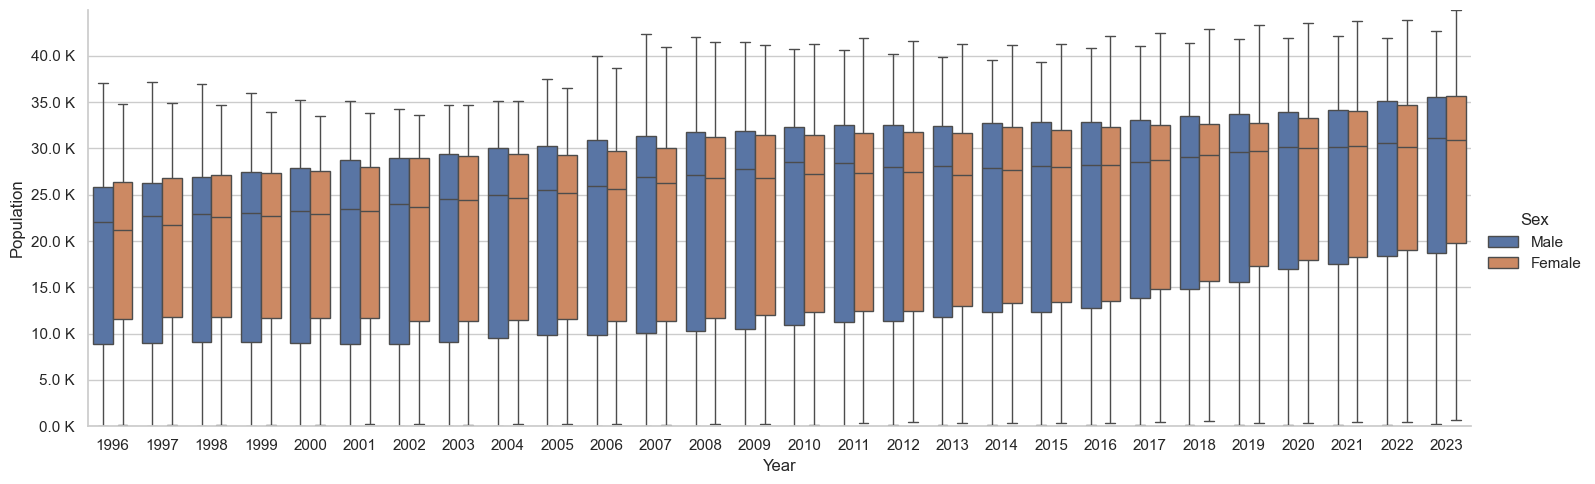

In [94]:
male_female_plot = sns.catplot(data=population_df_filtered, x='Year', y='VALUE', hue="Sex", kind="box", height= 5, aspect=3)

male_female_plot.set_axis_labels("Year", "Population")
male_female_plot.set(ylim=(0, population_df_filtered['VALUE'].max()))
male_female_plot.ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()

The graph below shows the population in Ireland from 1926 to 2023 with the sex breakdown. We can see that until the 80s the male population was higher than the female, however since then female population has increased. What might be the reasons for that? 

Overall, the population in Ireland is increasing. 

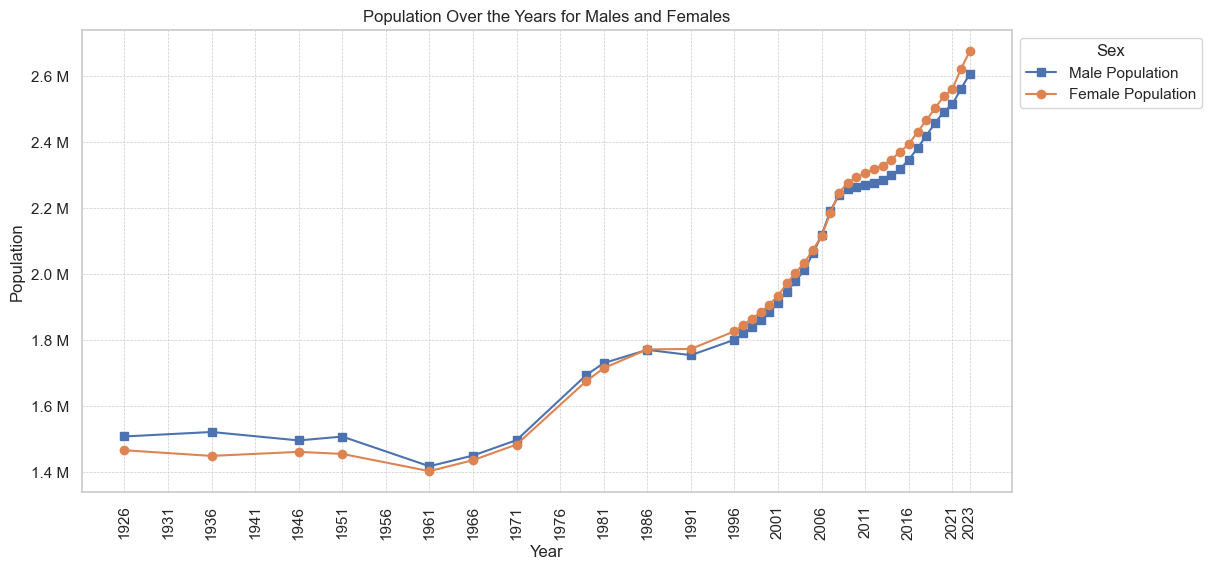

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(years, male_values, label='Male Population', marker='s')
plt.plot(years, female_values, label='Female Population', marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 5
xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [96]:
pivot_filtered = population_df_filtered.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')
pivot_filtered

Sex,Female,Male
Year,,
1996,1825855,1800232
1997,1844919,1819394
1998,1864223,1838859
1999,1883034,1858613
2000,1906590,1882946
2001,1934070,1913128
2002,1971039,1946164
2003,2002939,1976914
2004,2033274,2011914


In [97]:
# WE SHOULD CONVERT AGE TO INTEGER
# ValueError: could not convert string to float: 'Under 1 year'

#plt.figure(figsize=(20,10))
#c= population_df_filtered.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)

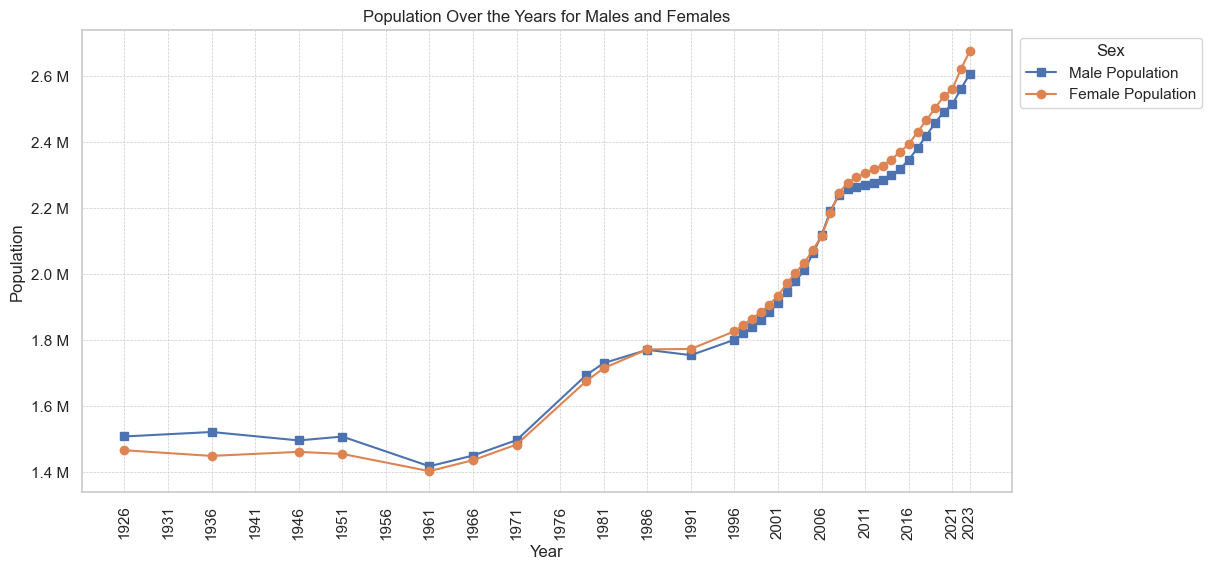

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(years, male_values, label='Male Population', marker='s')
plt.plot(years, female_values, label='Female Population', marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 5
xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

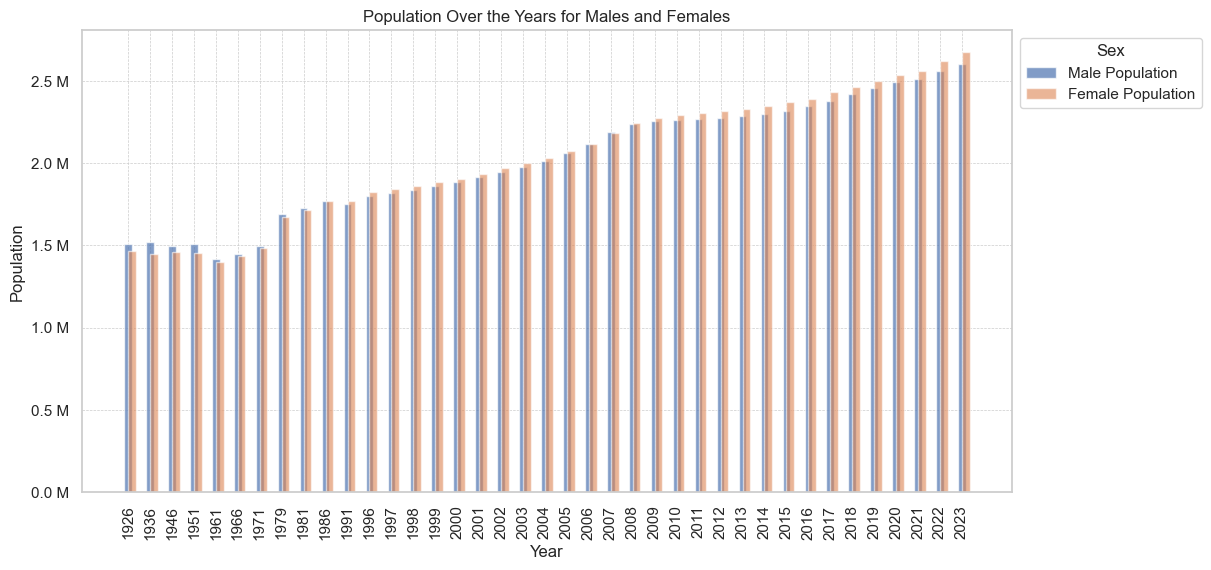

In [99]:
# BAR CHART
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(years))

plt.bar(index, male_values, bar_width, label='Male Population', align='center', alpha=0.7)
plt.bar(index, female_values, bar_width, label='Female Population', align='edge', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.xticks(index, years, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Sex',loc='upper left', bbox_to_anchor=(1, 1))

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

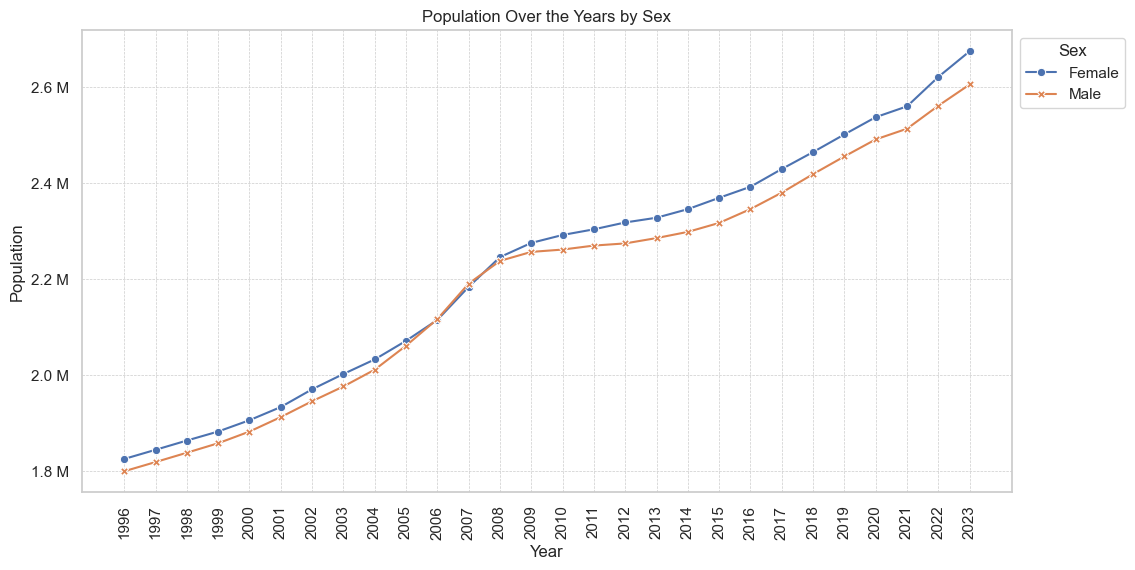

In [100]:
pivot_filtered = population_df_filtered.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.lineplot(data=pivot_filtered, markers=True, dashes=False)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years by Sex')

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 1
xticks = [pivot_filtered.index[0], pivot_filtered.index[-1]] + list(range(pivot_filtered.index[0] + tick_interval, pivot_filtered.index[-1], tick_interval))
plt.xticks(xticks, rotation=90)

plt.show()

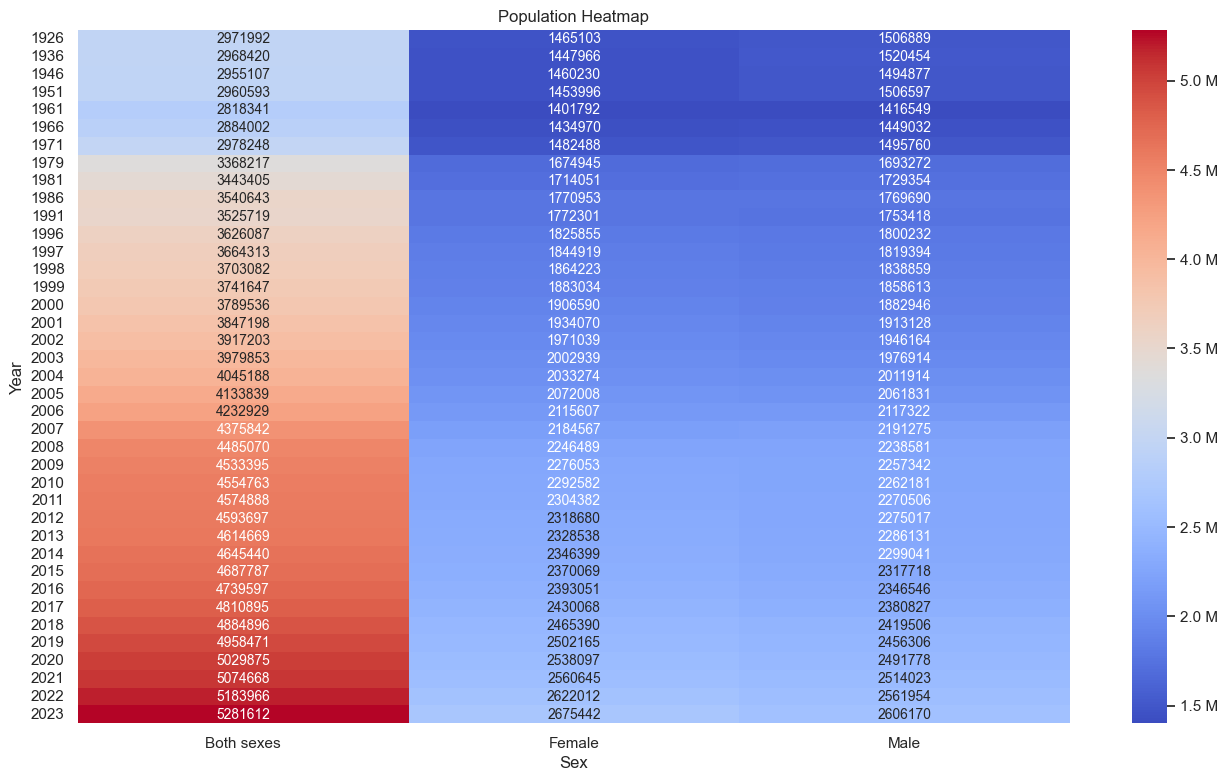

In [101]:
df = pd.DataFrame(population_df)

heatmap_data = df.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='first')

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', annot_kws={'size': 10})
plt.title('Population Heatmap')
plt.xlabel('Sex')
plt.ylabel('Year')

cbar = heatmap.collections[0].colorbar
cbar.formatter = FuncFormatter(millions_formatter)
cbar.update_ticks()

plt.show()

In [102]:
# IDEA
# Show the percentage increase or decrease in population for each period - between each year in the dataset or per 5-10 years.

#### **Population Projection**

In [103]:
# Maybe I need to filter just the Year and VALUE columns?
filtered_BothSex = population_df[(population_df['Single Year of Age'] == 'All ages') & (population_df['Sex'] == 'Both sexes') & (population_df['Year'] >= 2003)]

# removing of all the clolumns which all the values are hyphens. We don't need them.
def is_all_hyphens(column):
    return not all(column == '-')
filtered_BothSex = filtered_BothSex.loc[:, filtered_BothSex.apply(is_all_hyphens)]

filtered_BothSex

,Year,Single Year of Age,Sex,UNIT,VALUE,Value_in_thousands
5454,2003,All ages,Both sexes,Number,3979853,3979.9
5757,2004,All ages,Both sexes,Number,4045188,4045.2
6060,2005,All ages,Both sexes,Number,4133839,4133.8
6363,2006,All ages,Both sexes,Number,4232929,4232.9
6666,2007,All ages,Both sexes,Number,4375842,4375.8
6969,2008,All ages,Both sexes,Number,4485070,4485.1
7272,2009,All ages,Both sexes,Number,4533395,4533.4
7575,2010,All ages,Both sexes,Number,4554763,4554.8
7878,2011,All ages,Both sexes,Number,4574888,4574.9
8181,2012,All ages,Both sexes,Number,4593697,4593.7


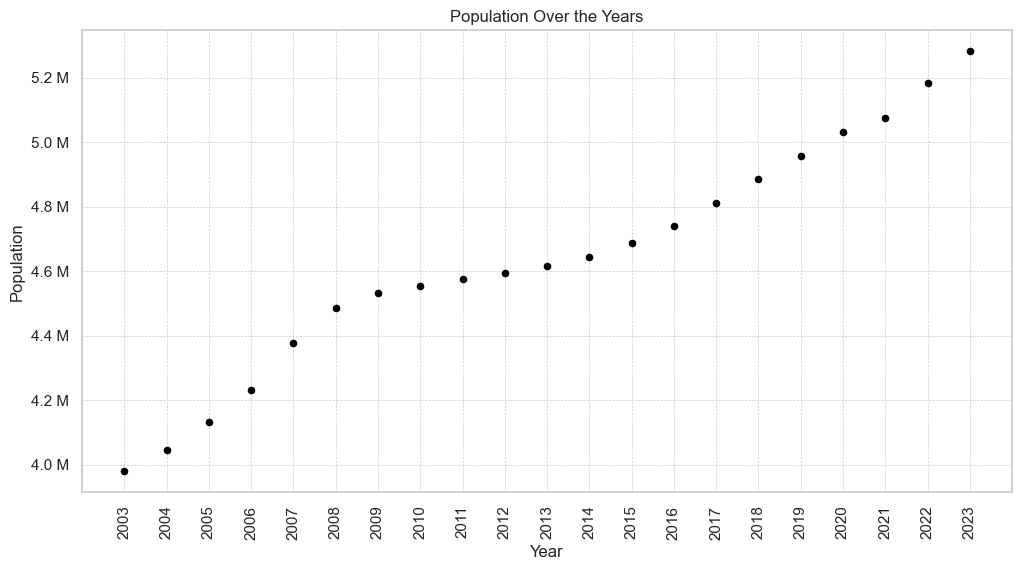

In [153]:
filtered_BothSex.plot(kind='scatter', x='Year', y='VALUE', figsize=(12, 6) ,color='black')

plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
years = filtered_BothSex['Year'].values
plt.xticks(years, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()


In [148]:
X = filtered_BothSex[['Year']]
y = filtered_BothSex['VALUE']


model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)


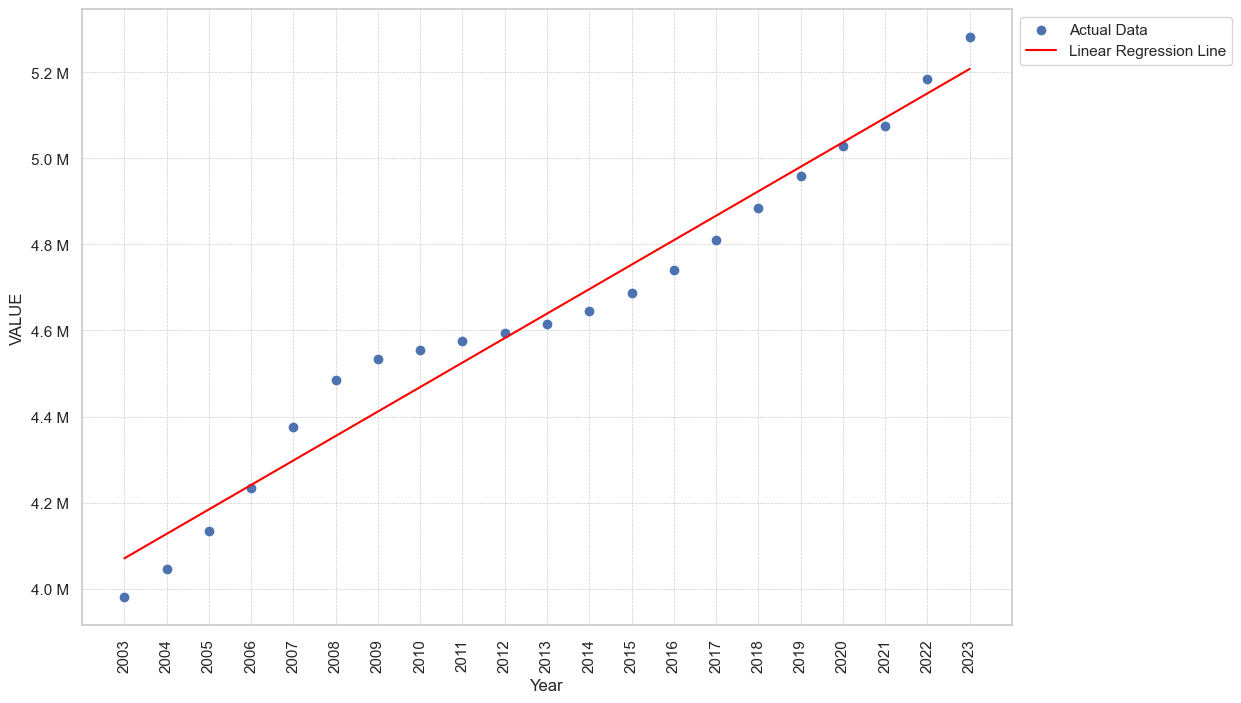

In [151]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, predictions, color='red', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('VALUE')
years = filtered_BothSex['Year'].values
plt.xticks(years, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

In [108]:
new_data = pd.DataFrame({'Year': [2050]})
predicted_value_2050 = model.predict(new_data)

In [159]:
new_data = pd.DataFrame({'Year': [2050]})

# Make predictions for the year 2050
predicted_value_2050 = model.predict(new_data)

print(f"Predicted value for the population for Year 2050: {predicted_value_2050[0]:.0f}")

Predicted value for the population for Year 2050: 6744209


https://www.cso.ie/en/releasesandpublications/ep/p-plfp/populationandlabourforceprojections2017-2051/populationprojectionsresults/?fbclid=IwAR0y2ch0t6PVr-Rbk_qAo7pzcDPPPqGXHRWB4wnp5B9MK39WAtVmeEPauWo 

When compared to the Central Statistic Office we see that our estimated value of 6.7M is the same as the one we see on the Statistics Office. 

#### **The immigration dataset**

The same EDA analysis will be performed for the second dataset which will be in regards ot the immgiration. 

In [109]:
migration_df = pd.read_csv('PEA18.20231016T141007.csv')

In [110]:
migration_df.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1


In [111]:
#access the size of the dataset
print("There are", migration_df.size, "values in total across the whole dataset")

There are 31968 values in total across the whole dataset


In [112]:
migration_df.shape

(2664, 12)

In [113]:
migration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATISTIC              2664 non-null   object 
 1   STATISTIC Label        2664 non-null   object 
 2   TLIST(A1)              2664 non-null   int64  
 3   Year                   2664 non-null   int64  
 4   C02719V03286           2664 non-null   object 
 5   Country                2664 non-null   object 
 6   C02199V02655           2664 non-null   object 
 7   Sex                    2664 non-null   object 
 8   C02542V03077           2664 non-null   int64  
 9   Origin or Destination  2664 non-null   object 
 10  UNIT                   2664 non-null   object 
 11  VALUE                  2104 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 249.9+ KB


In [114]:
migration_df.describe()

,TLIST(A1),Year,C02542V03077,VALUE
count,2664.000000,2664.000000,2664.000000,2104.000000
mean,2005.000000,2005.000000,3.333333,8.943726
std,10.679083,10.679083,1.699992,15.513703
min,1987.000000,1987.000000,1.000000,-43.900000
25%,1996.000000,1996.000000,1.000000,1.800000
50%,2005.000000,2005.000000,4.000000,4.700000
75%,2014.000000,2014.000000,5.000000,10.200000
max,2023.000000,2023.000000,5.000000,151.100000


In [115]:
missing_data = migration_df.isna()
missing_data

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2659,False,False,False,False,False,False,False,False,False,False,False,False
2660,False,False,False,False,False,False,False,False,False,False,False,False
2661,False,False,False,False,False,False,False,False,False,False,False,False
2662,False,False,False,False,False,False,False,False,False,False,False,False


In comparison to the first dataset, here we do have missing values in the VALUE column. We should explore those and understand what is the best way to deal with them. 

In [116]:
missing_data_count = migration_df.isna().sum()
missing_data_count

STATISTIC                  0
STATISTIC Label            0
TLIST(A1)                  0
Year                       0
C02719V03286               0
Country                    0
C02199V02655               0
Sex                        0
C02542V03077               0
Origin or Destination      0
UNIT                       0
VALUE                    560
dtype: int64

In [117]:
rows_with_nan = migration_df[migration_df['VALUE'].isna()]
rows_with_nan

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
18,PEA18,Estimated Migration (Persons in April),1987,1987,CA,Canada,-,Both sexes,1,Net migration,Thousand,NaN
19,PEA18,Estimated Migration (Persons in April),1987,1987,CA,Canada,-,Both sexes,4,Emigrants: All destinations,Thousand,NaN
20,PEA18,Estimated Migration (Persons in April),1987,1987,CA,Canada,-,Both sexes,5,Immigrants: All origins,Thousand,NaN
21,PEA18,Estimated Migration (Persons in April),1987,1987,CA,Canada,1,Male,1,Net migration,Thousand,NaN
22,PEA18,Estimated Migration (Persons in April),1987,1987,CA,Canada,1,Male,4,Emigrants: All destinations,Thousand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1471,PEA18,Estimated Migration (Persons in April),2007,2007,AU,Australia,1,Male,4,Emigrants: All destinations,Thousand,NaN
1472,PEA18,Estimated Migration (Persons in April),2007,2007,AU,Australia,1,Male,5,Immigrants: All origins,Thousand,NaN
1473,PEA18,Estimated Migration (Persons in April),2007,2007,AU,Australia,2,Female,1,Net migration,Thousand,NaN
1474,PEA18,Estimated Migration (Persons in April),2007,2007,AU,Australia,2,Female,4,Emigrants: All destinations,Thousand,NaN


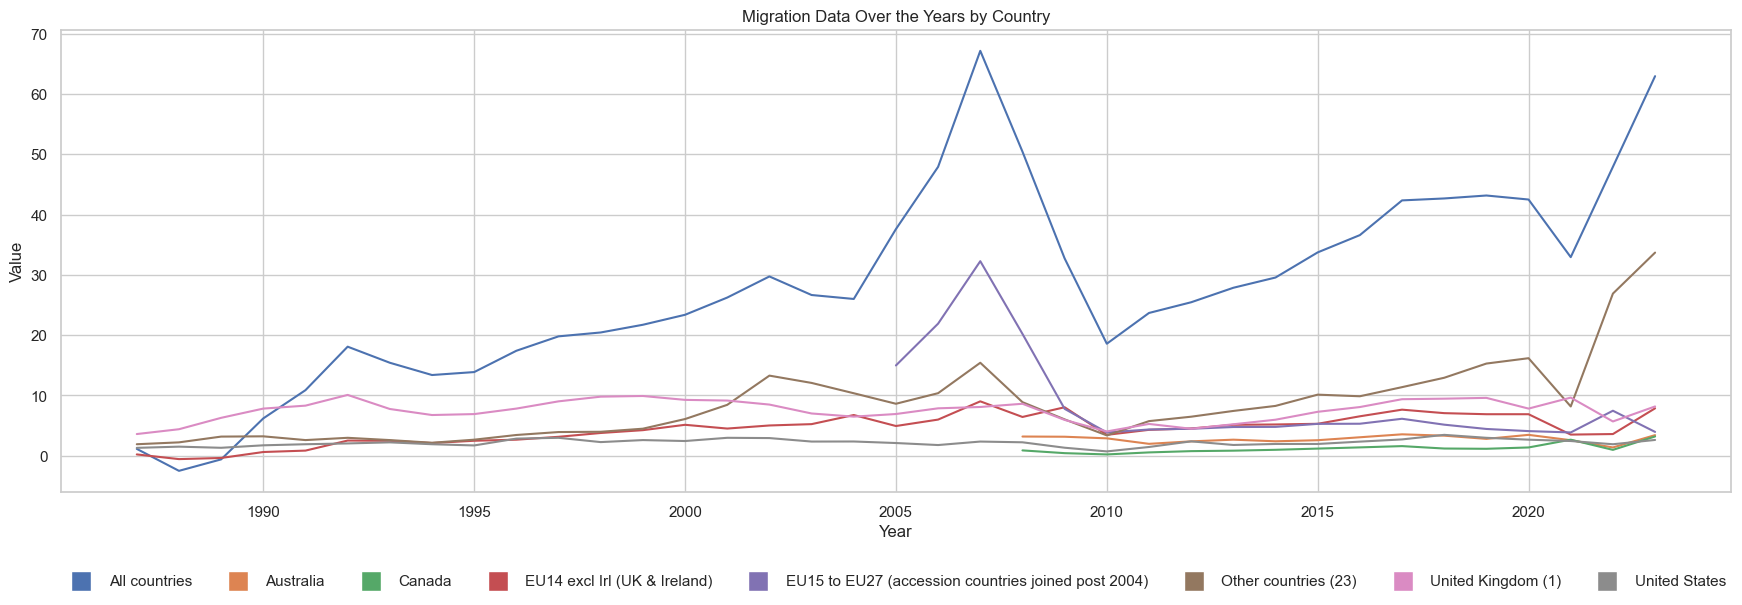

In [118]:
plt.figure(figsize=(21.55, 6))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
legend_elements = []

pivot_table = migration_df.pivot_table(index='Year', columns='Country', values='VALUE')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Migration Data Over the Years by Country')

for i, country in enumerate(pivot_table.columns):
    color = colors[i]
    plt.plot(pivot_table.index, pivot_table[country], color, label=country)
    #legend_elements.append(Line2D([0], [0], color=color, label=country))
    legend_elements.append(plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color,label=country, markersize=15))

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, frameon=False)
plt.show()

In [119]:
emigrants = migration_df[(migration_df['Origin or Destination'] == 'Emigrants: All destinations') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
immigrants = migration_df[(migration_df['Origin or Destination'] == 'Immigrants: All origins') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
net_migration = migration_df[(migration_df['Origin or Destination'] == 'Net migration') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
years = migration_df['Year'].unique()
emigrants_values = emigrants['VALUE'].values
immigrants_values = immigrants['VALUE'].values
net_migration_values = net_migration['VALUE'].values

emigration_and_migration = pd.DataFrame({'Years': years, 'Emigrants': emigrants_values, 'Immigrants': immigrants_values, 'Net migration': net_migration_values})


emigration_and_migration

,Years,Emigrants,Immigrants,Net migration
0,1987,40.2,17.2,-23.0
1,1988,61.1,19.2,-41.9
2,1989,70.6,26.7,-43.9
3,1990,56.3,33.3,-22.9
4,1991,35.3,33.3,-2.0
5,1992,33.4,40.7,7.4
6,1993,35.1,34.7,-0.4
7,1994,34.8,30.1,-4.7
8,1995,33.1,31.2,-1.9
9,1996,31.2,39.2,8.0


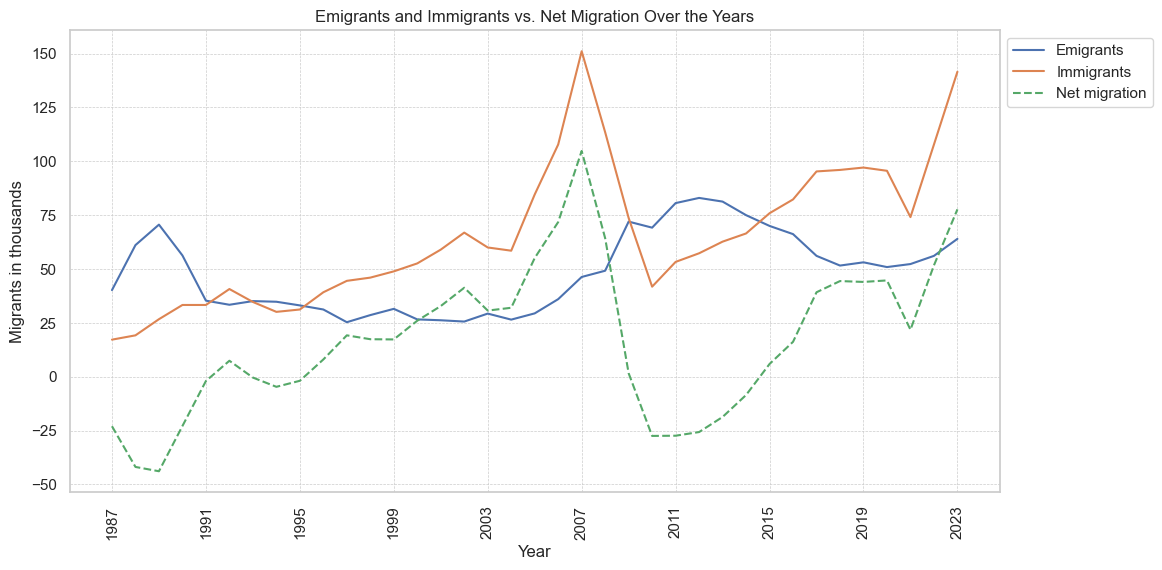

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(years, emigrants_values, label='Emigrants', marker='')
plt.plot(years, immigrants_values, label='Immigrants', marker='')
plt.plot(years, net_migration_values, label='Net migration', linestyle = '--', marker='')
plt.xlabel('Year')
plt.ylabel('Migrants in thousands')
plt.title('Emigrants and Immigrants vs. Net Migration Over the Years')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 4
xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)
plt.legend(title='Migration')
#plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


From the grpaph above we can see that the highest number of migrants was in 2007, and we can see a trend of increasing the immigration in the last 2 years. 

We can see a 15-year high when it comes to the immigrants. There is also an increase in the last couple of years for the emigrants.

The decrease we see around 2019-2021 - COVID

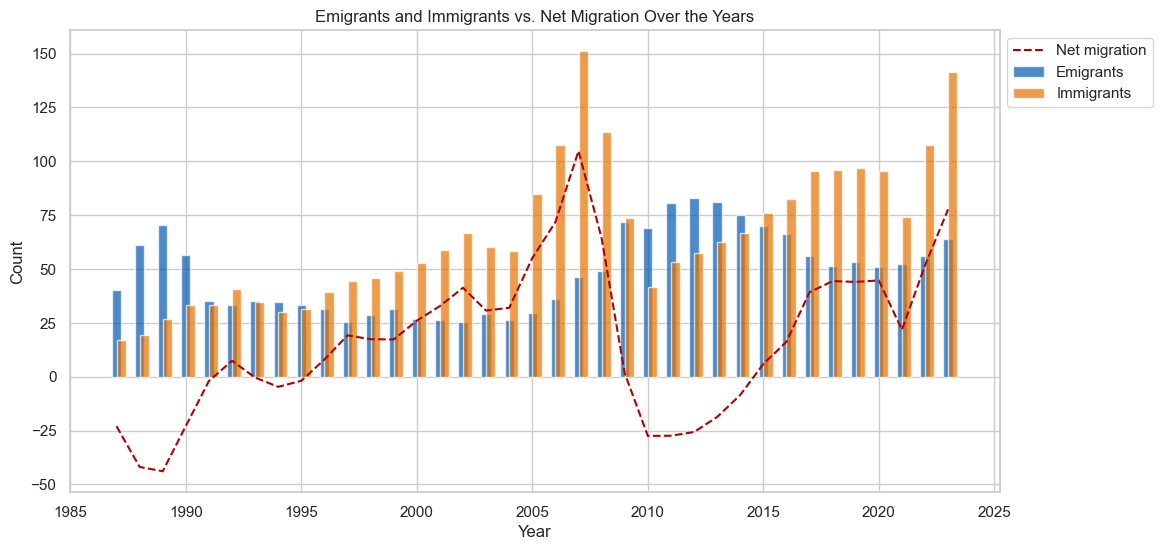

In [121]:
plt.figure(figsize=(12,6))

plt.bar(years, emigrants_values, label='Emigrants', color='#0059b3', alpha=0.7, width=0.4)
plt.bar(years, immigrants_values, label='Immigrants', color='#e67300', alpha=0.7, width=0.4, align='edge')

# Add a line plot for 'Net migration'
plt.plot(years, net_migration_values, label='Net migration', marker='', linestyle='--', color='#b30000')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.title('Emigrants and Immigrants vs. Net Migration Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [122]:
emigrants = migration_df[(migration_df['Origin or Destination'] == 'Emigrants: All destinations') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN')]
immigrants = migration_df[(migration_df['Origin or Destination'] == 'Immigrants: All origins') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN')]
countries = migration_df['Country'].unique()
# emigrants_values = emigrants['VALUE'].values
# immigrants_values = immigrants['VALUE'].values

# emigration_and_migration = pd.DataFrame({'Country': countries, 'Emigrants': emigrants_values, 'Immigrants': immigrants_values})


# emigration_and_migration

emigrants
# immigrants
# countries

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
1,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
10,PEA18,Estimated Migration (Persons in April),1987,1987,US,United States,-,Both sexes,4,Emigrants: All destinations,Thousand,9.9
19,PEA18,Estimated Migration (Persons in April),1987,1987,CA,Canada,-,Both sexes,4,Emigrants: All destinations,Thousand,NaN
28,PEA18,Estimated Migration (Persons in April),1987,1987,AU,Australia,-,Both sexes,4,Emigrants: All destinations,Thousand,NaN
37,PEA18,Estimated Migration (Persons in April),1987,1987,ZZWORX23,Other countries (23),-,Both sexes,4,Emigrants: All destinations,Thousand,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2620,PEA18,Estimated Migration (Persons in April),2023,2023,AU,Australia,-,Both sexes,4,Emigrants: All destinations,Thousand,4.7
2629,PEA18,Estimated Migration (Persons in April),2023,2023,ZZWORX23,Other countries (23),-,Both sexes,4,Emigrants: All destinations,Thousand,11.7
2638,PEA18,Estimated Migration (Persons in April),2023,2023,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,64.0
2647,PEA18,Estimated Migration (Persons in April),2023,2023,E1420XIE,EU14 excl Irl (UK & Ireland),-,Both sexes,4,Emigrants: All destinations,Thousand,13.9


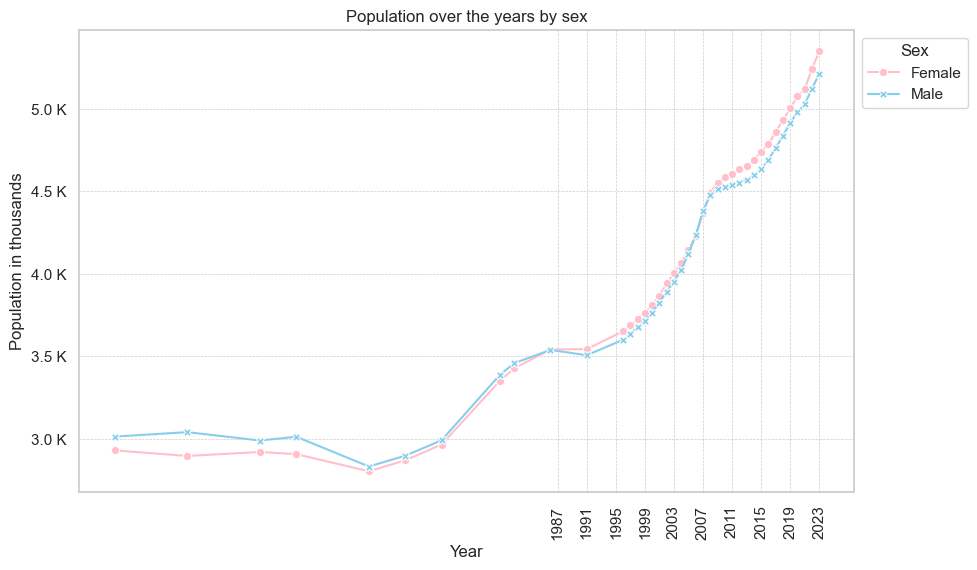

In [123]:
filtered_pivot_table = population_df[population_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='Value_in_thousands', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [124]:
#if we want to include the objects we need the following but in our dataframe this doesn't give us a lot of useful information
population_df.describe(include=object)

,Age category,Single Year of Age,Sex category,Sex,UNIT
count,11817,11817,11817,11817,11817
unique,101,101,3,3,1
top,-,All ages,-,Both sexes,Number
freq,117,117,3939,3939,11817


In [125]:
#two methods to check if we have some null/missing values
#population_df.isnull().sum()
population_df.isna().sum()

Year                  0
Age category          0
Single Year of Age    0
Sex category          0
Sex                   0
UNIT                  0
VALUE                 0
Value_in_thousands    0
dtype: int64

In [126]:
population_df[population_df['VALUE'].isna()]

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands


In [127]:
#we will clean some of the columns as they won't be useful for our analysis

#to_drop = ['STATISTIC Label', 'STATISTIC', 'TLIST(A1)', 'C02076V03371', 'C02199V02655']

#population_df.drop(to_drop, inplace=True, axis=1)

In [128]:
population_df.head()

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
0,1926,-,All ages,-,Both sexes,Number,2971992,2972.0
1,1926,-,All ages,1,Male,Number,1506889,1506.9
2,1926,-,All ages,2,Female,Number,1465103,1465.1
3,1926,200,Under 1 year,-,Both sexes,Number,55391,55.4
4,1926,200,Under 1 year,1,Male,Number,28084,28.1


In [129]:
#checking all unique values we have for the Year column (integer)
population_df['Year'].unique()

array([1926, 1936, 1946, 1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [130]:
#we will be looking at the data only for the past 20 years, so we would need to filter out the data so we create a new DataFrame which will have data from 2013 onwards
population_last_10_years_df = population_df[(population_df['Year'] > 2002)]

In [131]:
#confirming that we've filtered out the data
population_last_10_years_df.head()

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
5454,2003,-,All ages,-,Both sexes,Number,3979853,3979.9
5455,2003,-,All ages,1,Male,Number,1976914,1976.9
5456,2003,-,All ages,2,Female,Number,2002939,2002.9
5457,2003,200,Under 1 year,-,Both sexes,Number,60454,60.5
5458,2003,200,Under 1 year,1,Male,Number,31047,31.0


In [132]:
#checking all unique appearances in the Sex column
population_last_10_years_df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [133]:
sex_totals = population_last_10_years_df.groupby('Sex')['VALUE'].sum().reset_index()

print(sex_totals)

          Sex      VALUE
0  Both sexes  194842680
1      Female   98156914
2        Male   96685766


In [134]:
pivot_table = population_last_10_years_df.pivot_table(index=['Year', 'Sex'], values='VALUE', aggfunc='sum')

# Reset index to make 'Year' and 'Sex' regular columns
pivot_table.reset_index(inplace=True)

print(pivot_table)

    Year         Sex     VALUE
0   2003  Both sexes   7959706
1   2003      Female   4005878
2   2003        Male   3953828
3   2004  Both sexes   8090376
4   2004      Female   4066548
..   ...         ...       ...
58  2022      Female   5244024
59  2022        Male   5123908
60  2023  Both sexes  10563224
61  2023      Female   5350884
62  2023        Male   5212340

[63 rows x 3 columns]


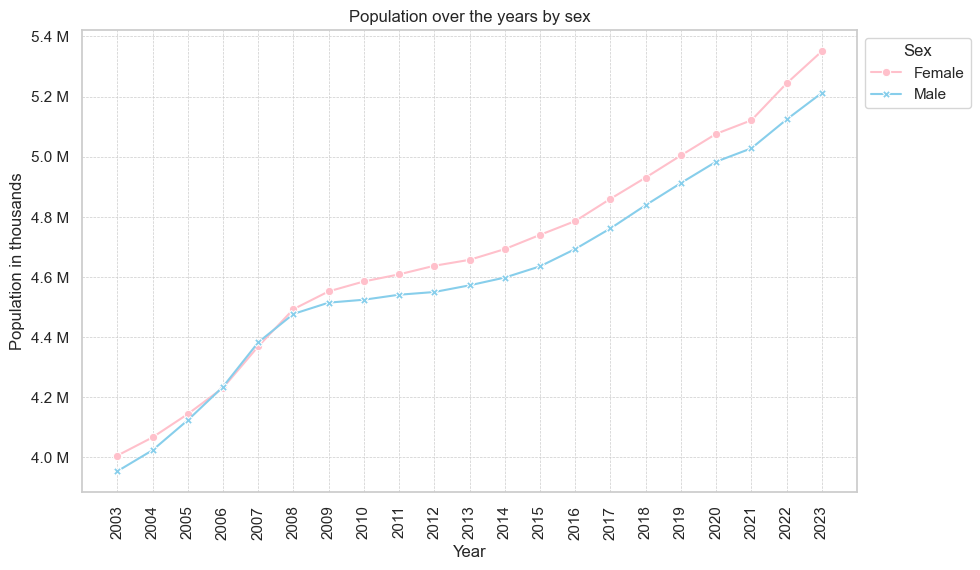

In [135]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']
pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In the graprh representation above we can cleary see that the population of Ireland both for male and female has been increasing for the last ten years which automatically means that the population in general is increasing, which can be seen in the graph below.

Please keep in mind that those values are in thousands, which gives us a total of around 5.3 Million people in total for 2023. 

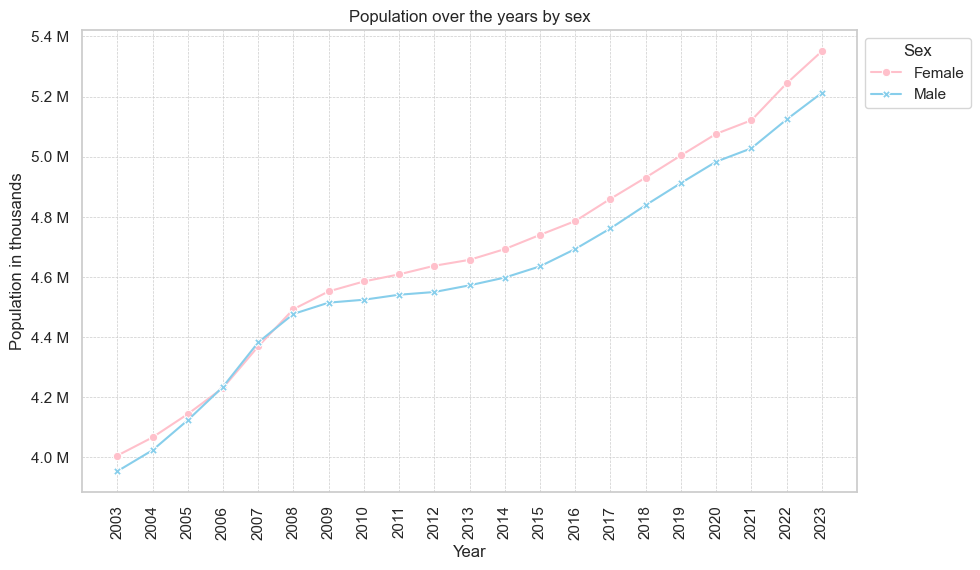

In [136]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


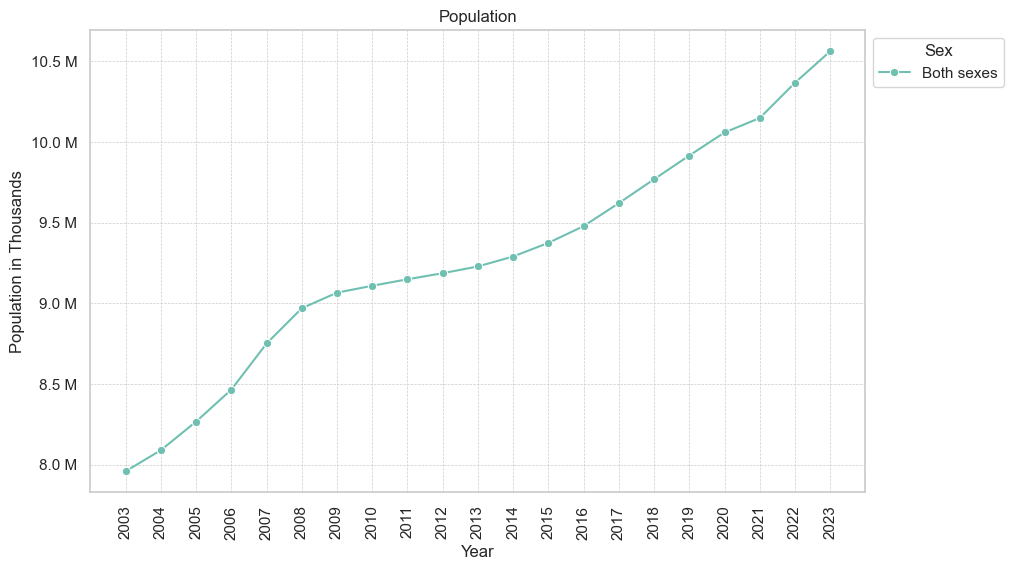

In [137]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] == 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Both sexes': '#70c0b2'}

# Create the line plot
sns.lineplot(data=pivot_table, palette = custom_palette , markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.title('Population')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()